<a href="https://colab.research.google.com/github/isha-ingersol/ComputerVisionAndImaging/blob/main/CVITask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

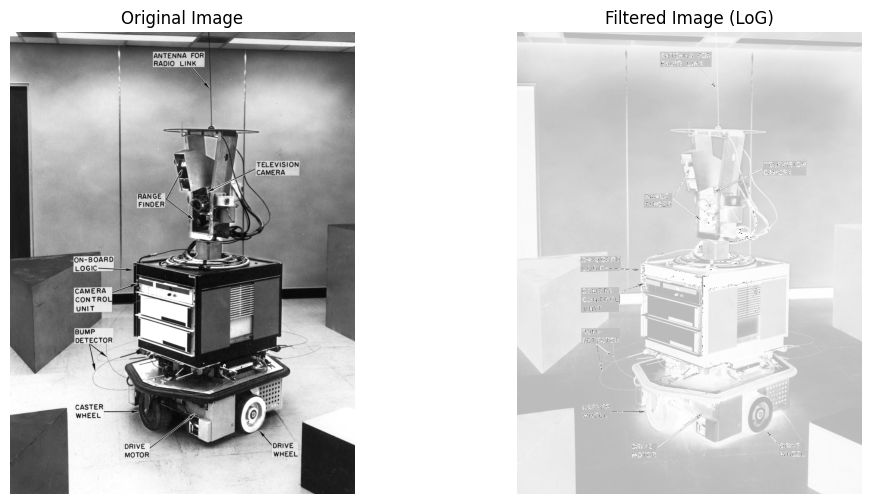

The Laplacian of Gaussian filter enhances edges in the image while suppressing noise.
It highlights sudden intensity changes (edges) and helps in edge detection.
However, it may also amplify noise, so careful selection of filter size and sigma is important.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.ndimage import convolve

# Load the image using scikit-image
image_path = "/content/CVI/shakey.150.gif"

try:
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if image is grayscale or color
        image_gray = color.rgb2gray(image)  # Convert color image to grayscale
    else:
        image_gray = image  # No need to convert if already grayscale
except Exception as e:
    print("Error:", e)
    image_gray = None

if image_gray is not None:
    # Define function to create LoG filter mask
    def LoG_filter(size, sigma):
        x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
        mask = -(1 / (np.pi * sigma ** 4)) * (1 - (x ** 2 + y ** 2) / (2 * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
        return mask

    # Create and apply LoG filter
    filter_size = 5  # Filter size
    sigma = 1.4  # Standard deviation
    LoG_mask = LoG_filter(filter_size, sigma)
    filtered_image = convolve(image_gray, LoG_mask, mode='nearest')

    # Plotting the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image (LoG)')
    plt.axis('off')

    plt.show()

    print("The Laplacian of Gaussian filter enhances edges in the image while suppressing noise.")
    print("It highlights sudden intensity changes (edges) and helps in edge detection.")
    print("However, it may also amplify noise, so careful selection of filter size and sigma is important.")
else:
    print("Unable to load image.")


# Report/Justification

##Task Description:
Start by briefly summarizing Task 1. Mention that the task involves implementing a Laplacian of Gaussian (LoG) filter and applying it to an image.

##Aim:
State the aim of Task 1, which is to enhance edges in an image while suppressing noise using the Laplacian of Gaussian filter.

##Method:
- Explain that the Laplacian of Gaussian (LoG) filter is a two-step process:
  - Gaussian smoothing: The image is convolved with a Gaussian kernel to reduce noise and blur the image slightly.
  - Laplacian operator: The Laplacian operator is applied to the smoothed image to detect edges. This operator highlights regions of rapid intensity change, which correspond to edges in the image.
- Describe the implementation steps:
  - Load the image using scikit-image.
  - Convert the image to grayscale if it's not already in grayscale.
  - Define a function to create the LoG filter mask.
  - Create the LoG filter mask with the desired filter size and standard deviation.
  - Convolve the grayscale image with the LoG filter mask using the scipy.ndimage.convolve function.
- Justify the use of each step:
  - Gaussian smoothing: Reduces noise in the image, making it easier to detect edges.
  - Laplacian operator: Highlights edges by emphasizing areas of rapid intensity change.
  - Convolution: Applies the LoG filter to the image efficiently.
- Explain how the LoG filter enhances edges:
  - The LoG filter responds strongly to areas of rapid intensity change, such as edges in the image.
  - It suppresses noise by smoothing the image with a Gaussian kernel before applying the Laplacian operator.

##Results:

Describe the results obtained from applying the LoG filter to the image:
- Display the original grayscale image and the filtered image side by side.
- Highlight the enhanced edges in the filtered image compared to the original.
- Discuss any noticeable changes or improvements in edge detection.

Use visual aids (images) to support the description of the results.

##Conclusions:

###Summarize the key findings and observations from Task 1:
- The Laplacian of Gaussian filter effectively enhances edges in the image while suppressing noise.
- It highlights regions of rapid intensity change, which correspond to edges in the image.
- Careful selection of filter size and standard deviation is crucial for optimal edge detection and noise suppression.

###Discuss the significance and potential applications of the results:
- Improved edge detection can be beneficial for various image processing tasks, such as object detection, segmentation, and feature extraction.
- The method demonstrated in Task 1 provides a simple yet effective approach for enhancing edges in images.
